In [175]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [176]:
df =  pd.read_csv("UniversalBank.csv")

In [177]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [179]:
drop_id = df.drop("ID",axis=1,inplace=True)

In [180]:
check_null = df.isnull().sum()

In [181]:
df_des = df.describe()

In [182]:
corr_mat = df.corr()

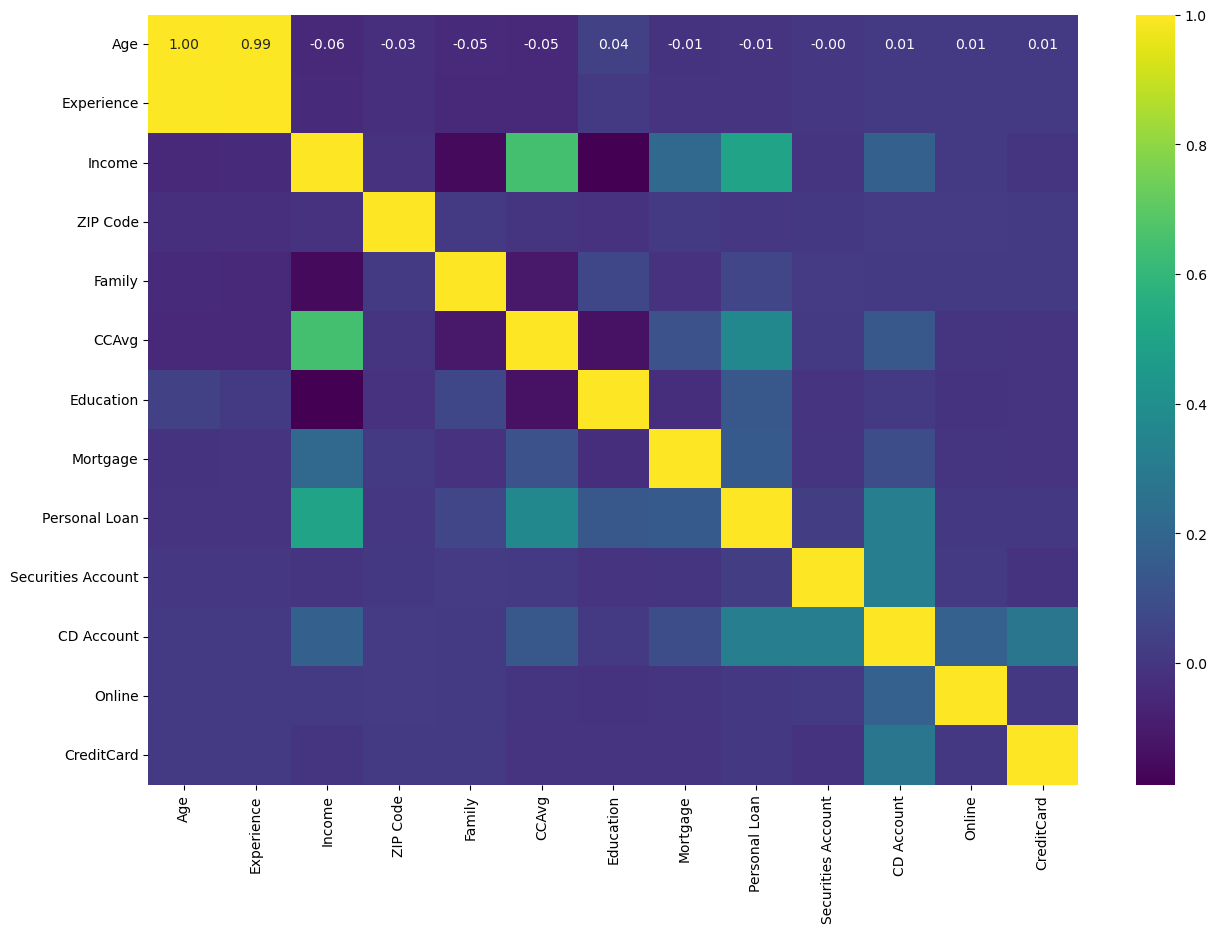

In [183]:
plt.figure(figsize = (15,10))
sns.heatmap(data= corr_mat, cmap = "viridis", annot = True ,fmt= ".2f")
plt.show()

In [184]:
df_scaler = df[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg','Education', 
                'Mortgage', 'Personal Loan', 'Securities Account',
                'CD Account', 'Online',]]
df_scaler_y = df[['CreditCard']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_scaler)
y_scaled = scaler.fit_transform(df_scaler_y)

In [185]:
X = X_scaled
y = df['CreditCard']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [186]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [187]:
y_pred =  model.predict(X_test)


In [198]:
score = accuracy_score(y_test,y_pred)
score

0.749